# 5.2节 小数据集训练CNN-基准组
## 基准组实验条件
### 数据集：小数据集
### 训练集：1,000/类别
### 验证集：500/类别
### 测试集：500/类别
### 是否使用数据增强：否
### 训练轮数：30/100
### 可参考教材pp107-111

## 1 分集，创建小样本数据集的训练域/验证域/测试域

### 1.1 创建小样本数据集目录（此部分代码仅需执行一次，后续跳过）
### 1.1.1 创建训练集、验证集、测试集目录

In [1]:
# import os,shutil

In [2]:
# -*- coding: utf-8 -*-
#原始数据解压目录
# original_dataset_dir = 'E:\\0-AI读书学习笔记\\99-dataset-lib\\cat_dog\\train'

In [3]:
# #创建小数据集目录
# small_dataset_dir = 'E:/0-AI读书学习笔记/99-dataset-lib/cat_dog/small_dataset_cat_dog'
# os.mkdir(small_dataset_dir)

In [4]:
# #创建小数据集中的训练集目录
# train_small_dataset_dir = os.path.join(small_dataset_dir,'train')
# os.mkdir(train_small_dataset_dir)

In [5]:
# #创建小数据集中的验证集目录
# validation_small_dataset_dir = os.path.join(small_dataset_dir,'validation')
# os.mkdir(validation_small_dataset_dir)

In [6]:
# #创建小数据集中的测试集目录
# test_small_dataset_dir = os.path.join(small_dataset_dir,'test')
# os.mkdir(test_small_dataset_dir)

### 1.1.2 进一步创建猫、狗子集

In [7]:
# #进一步对训练集中的猫和狗分类创建目录
# train_cat_small_dataset_dir = os.path.join(train_small_dataset_dir, 'cats')
# os.mkdir(train_cat_small_dataset_dir)

In [8]:
# train_dog_small_dataset_dir = os.path.join(train_small_dataset_dir, 'dogs')
# os.mkdir(train_dog_small_dataset_dir)

In [9]:
# #验证集目录猫、狗子目录
# validation_cat_small_dataset_dir = os.path.join(validation_small_dataset_dir, 'cats')
# os.mkdir(validation_cat_small_dataset_dir)


In [10]:
# validation_dog_small_dataset_dir = os.path.join(validation_small_dataset_dir, 'dogs')
# os.mkdir(validation_dog_small_dataset_dir)

In [11]:
# #测试集目录猫、狗子目录
# test_cat_small_dataset_dir = os.path.join(test_small_dataset_dir, 'cats')
# os.mkdir(test_cat_small_dataset_dir)
# test_dog_small_dataset_dir = os.path.join(test_small_dataset_dir, 'dogs')
# os.mkdir(test_dog_small_dataset_dir)

### 1.2 在创建好的目录下放置对应图片数据

In [12]:
# #将1000张猫的图片复制到train_cat_small_dataset_dir
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_cat_small_dataset_dir, fname)
#     shutil.copyfile(src,dst)

In [13]:
# #将1000张狗的图片复制到train_dog_small_dataset_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_dog_small_dataset_dir, fname)
#     shutil.copyfile(src,dst)

In [14]:
# #将500张猫的图片复制到validation_cat_small_dataset_dir
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_cat_small_dataset_dir, fname)
#     shutil.copyfile(src,dst)

In [15]:
# #将500张狗的图片复制到validation_dog_small_dataset_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_dog_small_dataset_dir, fname)
#     shutil.copyfile(src,dst)

In [16]:
# #将500张猫的图片复制到test_cat_small_dataset_dir
# fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_cat_small_dataset_dir, fname)
#     shutil.copyfile(src,dst)

In [17]:
# #将500张狗的图片复制到test_dog_small_dataset_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_dog_small_dataset_dir, fname)
#     shutil.copyfile(src,dst)

### 1.3 查看新创建的小数据集

In [18]:
# #os.listdir(dir)，以列表形式返回目录下文件名
# print('total training small dataset cat images: ',len(os.listdir(train_cat_small_dataset_dir)))
# print('total training small dataset dog images: ',len(os.listdir(train_dog_small_dataset_dir)))
# print('total validation small dataset cat images: ',len(os.listdir(validation_cat_small_dataset_dir)))
# print('total validation small dataset dog images: ',len(os.listdir(validation_dog_small_dataset_dir)))
# print('total test small dataset cat images: ',len(os.listdir(test_cat_small_dataset_dir)))
# print('total test small dataset dog images: ',len(os.listdir(test_dog_small_dataset_dir)))

### 到目前为止，我们的数据集有2000个训练样本（猫、狗各5000个）；
### 验证集有1000个样本（猫狗各500个）；
### 测试集有1000个样本（猫狗各500个）

## 2 建模，构建卷积神经网络

### 整体考虑：
### -沿用Conv2D + MaxPooling2D组合
### -Conv2D的过滤器数量逐渐增加
### -本项目是一个二分类问题，因此最后一层的激活函数使用sigmoid

In [19]:
from keras import models
from keras import layers

### 2.1 初始化模型，按需添加层

In [20]:
#conv2D的filters从32增加到128
my_network = models.Sequential()
#32个filter
my_network.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)))
my_network.add(layers.MaxPooling2D((2,2)))
#64个filter
my_network.add(layers.Conv2D(64,(3,3),activation = 'relu'))
my_network.add(layers.MaxPooling2D((2,2)))
#128个filter
my_network.add(layers.Conv2D(128,(3,3),activation = 'relu'))
my_network.add(layers.MaxPooling2D((2,2)))
#128个filter
my_network.add(layers.Conv2D(128,(3,3),activation = 'relu'))
my_network.add(layers.MaxPooling2D((2,2)))

my_network.add(layers.Flatten()) #将3D展平为1D
my_network.add(layers.Dense(512, activation = 'relu'))
my_network.add(layers.Dense(1,activation='sigmoid'))#最后输出二元分类概率

In [21]:
my_network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

### 2.2 编译模型

In [22]:
my_network.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

## 3 加数，加载数据并对图像预处理

### step 1:读取图像
### step 2:将JPG文件解码为RGB像素网络
### step 3:将像素网络转换为浮点张量
### step 4:将[0,255]的像素值缩放到[0,1]

### 上述步骤可通过keras中的keras.preprocessing.image实现

In [23]:
from keras.preprocessing.image import ImageDataGenerator

#### 3.1 构建图片生成器实例（一种迭代对象），对所有图片进行归一化处理变换

In [24]:
#生成训练集图片生成器
train_datagen = ImageDataGenerator(rescale = 1./255)

In [25]:
#生成测试集图片生成器
test_datagen = ImageDataGenerator(rescale = 1./255)

#### 3.2 通过图片生成器实例从训练集/验证集目录读取图片，并指定图片输出尺寸为150x150

In [26]:
#读取训练集图片
#第1个参数：数据集目录
#第2个参数：图片输出大小，长 x 宽
#第3个参数：一次批量生成20个样本
#第4个参数：因为是二元分类问题，所以模式选择binary，多分类问题为categorical
train_generator = train_datagen.flow_from_directory(
    'D:/2-AI读书学习笔记/99-dataset-lib/cat_dog/small_dataset_cat_dog/train',
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [27]:
#读取验证集图片，与测试集共用同一个图片生成器实例
validation_generator = test_datagen.flow_from_directory(
    'D:/2-AI读书学习笔记/99-dataset-lib/cat_dog/small_dataset_cat_dog/validation',
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [28]:
#以train_generator为例，其迭代对象为data_batch和labels_batch，在每一次迭代中都包含20个样本（因为数据生成器中的batch_size为20）
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


In [29]:
for data_batch, labels_batch in train_generator:
    print(labels_batch)
    break

[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0.]


## 4 训练，用fit_generator训练数据

In [13]:
import time

start = time.time()

his_my_network = my_network.fit_generator(train_generator,
                                          steps_per_epoch = 100,
                                          epochs = 30,
                                          validation_data = validation_generator,
                                          validation_steps = 50)

end = time.time()
print('running time : %d s'%(end - start))


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 94s 944ms/step - loss: 0.7658 - acc: 0.5030 - val_loss: 0.6907 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 78s 775ms/step - loss: 0.7050 - acc: 0.5635 - val_loss: 0.6627 - val_acc: 0.6230
Epoch 3/30
100/100 [==============================] - 77s 775ms/step - loss: 0.6602 - acc: 0.6230 - val_loss: 0.6835 - val_acc: 0.6370
Epoch 4/30
100/100 [==============================] - 78s 778ms/step - loss: 0.6043 - acc: 0.6865 - val_loss: 0.6037 - val_acc: 0.6890
Epoch 5/30
100/100 [==============================] - 85s 855ms/step - loss: 0.5445 - acc: 0.7325 - val_loss: 0.6192 - val_acc: 0.6670
Epoch 6/30
100/100 [==============================] - 97s 965ms/step - loss: 0.5077 - acc: 0.7495 - val_loss: 0.5393 - val_acc: 0.7340
Epoch 7/30
100/100 [==============================] - 96s 963ms/step - loss: 0.4494 - acc: 0.7985 - val_loss: 0.56

#### 保存模型

In [34]:
my_network.save('D:/2-AI读书学习笔记/0-python深度学习/ch5/cats_and_dogs_small_my_network_without_DA.h5')

In [35]:
import pickle
with open('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_2_network_cnn_noda_trainHistoryDict.txt', 'wb') as file_pi:
    pickle.dump(his_my_network.history, file_pi)#将训练历史数据保存到指定文件中

## 5 评估模型
### 5.1 参考训练数据预处理方法，预先准备好测试集图片文件预处理函数
#### step 1:读取图像
#### step 2:将JPG文件解码为RGB像素网络
#### step 3:将像素网络转换为浮点张量
#### step 4:将[0,255]的像素值缩放到[0,1]

In [2]:
import numpy as np
def preprocess_img(img):
    x1 = image.img_to_array(img)
    x2 = x1 * 1./255
    x3 = np.expand_dims(x2, axis = 0)
    return x3

### 5.2 抽取测试集中的图片（特别是复杂场景下的图片）进行测试

In [3]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline 

#### A.读取测试图片1并进行预处理、预测

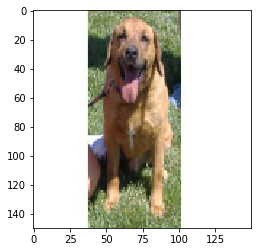

In [4]:
#指定图片存储路径
img_path1 = 'D:/2-AI读书学习笔记/99-dataset-lib/cat_dog/small_dataset_cat_dog/test/dogs/dog.1501.jpg'
img1 = image.load_img(img_path1, target_size = (150, 150))
plt.imshow(img1)

In [8]:
preprocess_img(img1).shape

(1, 150, 150, 3)

In [19]:
my_network.predict(preprocess_img(img1))

array([[1.]], dtype=float32)

#### 模型预测分类结果为：_____________________________

#### B.对测试图片2（多个同类）进行预处理、并预测

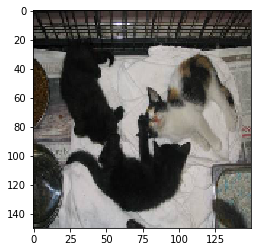

In [20]:
#指定非洲象图片存储路径
img_path2 = 'D:/2-AI读书学习笔记/99-dataset-lib/cat_dog/full_dataset_cat_dog/test/cats/cat.12436.jpg'
#通过target_size 指定图片加载尺寸为224 x 224，以适配VGG16模型
img2 = image.load_img(img_path2, target_size = (150, 150))
plt.imshow(img2)

In [21]:
my_network.predict(preprocess_img(img2))

array([[1.]], dtype=float32)

#### 模型预测分类结果为：_____________________________

#### C.对测试图片3（多个异类）进行预处理、并预测

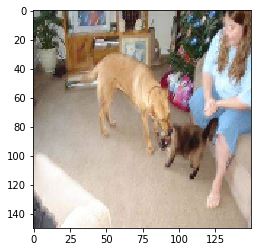

In [22]:
#指定非洲象图片存储路径
img_path3 = 'D:/2-AI读书学习笔记/99-dataset-lib/cat_dog/full_dataset_cat_dog/test/dogs/dog.12005.jpg'
#通过target_size 指定图片加载尺寸为224 x 224，以适配VGG16模型
img3 = image.load_img(img_path3, target_size = (150, 150))
plt.imshow(img3)

In [23]:
my_network.predict(preprocess_img(img3))

array([[0.00092154]], dtype=float32)

#### 模型预测分类结果为：_____________________________

#### D.对测试图片4（多个异类）进行预处理、并预测

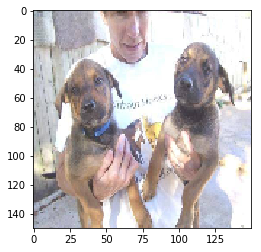

In [24]:
#指定非洲象图片存储路径
img_path4 = 'D:/2-AI读书学习笔记/99-dataset-lib/cat_dog/full_dataset_cat_dog/test/dogs/dog.12003.jpg'
#通过target_size 指定图片加载尺寸为224 x 224，以适配VGG16模型
img4 = image.load_img(img_path4, target_size = (150, 150))
plt.imshow(img4)

In [25]:
my_network.predict(preprocess_img(img4))

array([[0.984577]], dtype=float32)

#### 模型预测分类结果为：_____________________________

### 5.3 评估模型在训练集/验证集损失函数变化趋势

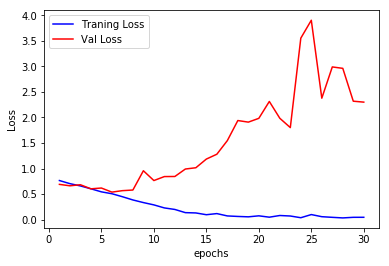

In [26]:
import matplotlib.pyplot as plt

train_loss = his_my_network.history['loss']
val_loss = his_my_network.history['val_loss']

epochs = range(1, len(train_loss)+1)

plt.plot(epochs, train_loss, 'b', label = 'Traning Loss')
plt.plot(epochs, val_loss, 'r', label = 'Val Loss')

plt.xlabel('epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

#### 由上图，模型在________

### 5.4 评估模型在训练集/验证集分类准确率变化趋势

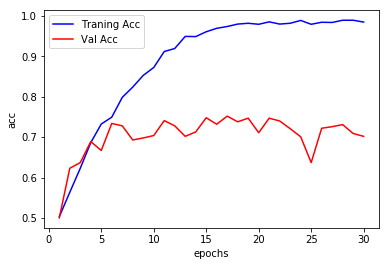

In [27]:
train_acc = his_my_network.history['acc']
val_acc = his_my_network.history['val_acc']

plt.plot(epochs, train_acc, 'b', label = 'Traning Acc')
plt.plot(epochs, val_acc, 'r', label = 'Val Acc')

plt.xlabel('epochs')
plt.ylabel('acc')

plt.legend()
plt.show()

#### 由上图，模型在________

### 5.5 评估模型在测试集上的表现
#### 教材未对测试集进行评估，以下代码为个人补充，如有问题，欢迎留言

In [43]:
import os
from keras.preprocessing import image

classes = ['cats','dogs']
files_name = []
test_true_labels = []
test_pred_labels = []
test_pred_probs = []

for c in classes:
    test_class_dir = 'D:/2-AI读书学习笔记/99-dataset-lib/cat_dog/small_dataset_cat_dog/test/{}'.format(c)
    for f in os.listdir(test_class_dir):
        
        files_name.append(f)
        test_true_labels.append(f[0:3])
        
        img_path = os.path.join(test_class_dir, f)
        img = image.load_img(img_path, target_size = (150, 150))
        pred = my_network.predict(preprocess_img(img))
        test_pred_probs.append(pred)
        
        pred_label = None
        #判断分类
        if pred[0] > 0.5:
            pred_label = 'dog'
        else:
            pred_label = 'cat'
        test_pred_labels.append(pred_label) 
        

import pandas as pd
df = pd.DataFrame(data={'file':files_name, 'true_label':test_true_labels,  'pred_label':test_pred_labels, 'pred_prob':test_pred_probs})


        
pred_correct_records = df[df['true_label'] == df['pred_label']].shape[0]
correct_rate = float(pred_correct_records)/float(1000)
correct_rate 

0.689

### 该模型在测试集上的分类准确率为___

### 5.6 查看分类错误图片

#### 查看将“猫”误认为“狗”的部分图片

In [44]:
df_error = df[(df['true_label'] != df['pred_label']) & (df['true_label'] == 'cat')]

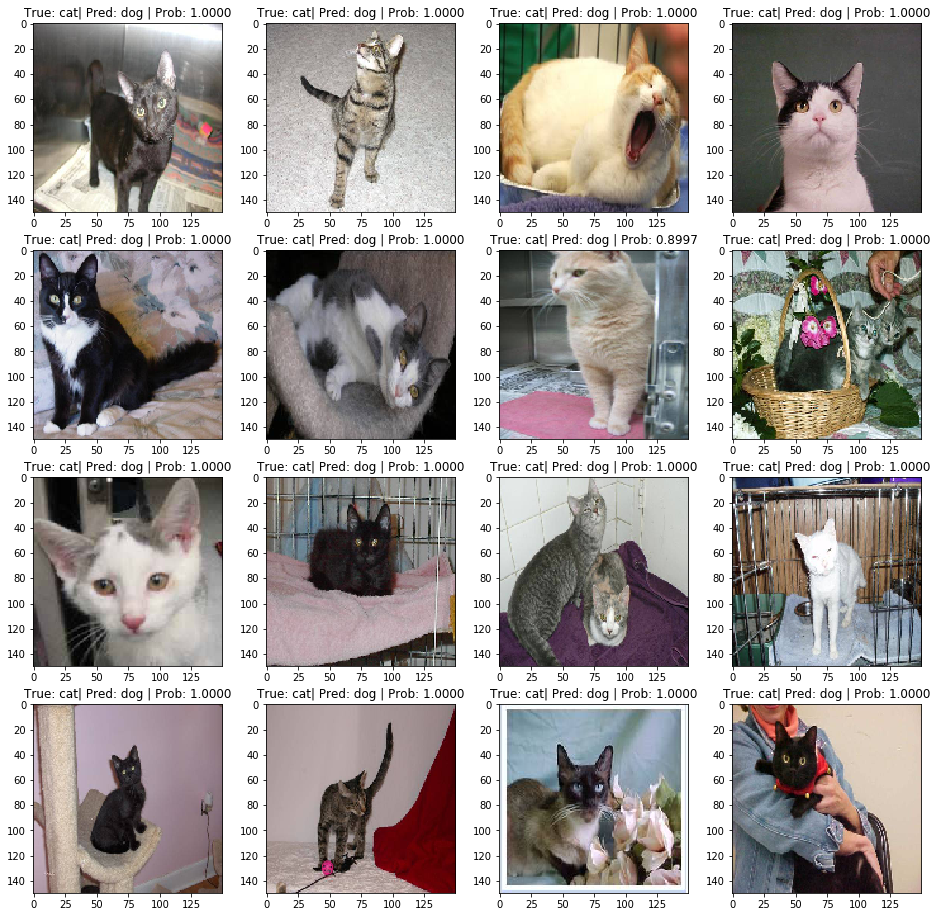

In [45]:
#对分类错误记录进行随机抽取，每次抽取16行记录，可以反复运行此段代码，随机查看分类错误图片
df_error_sample = df_error.sample(n=16, replace = False, axis = 0)
files_error = list(df_error_sample['file'])
true_labels_error =  list(df_error_sample['true_label'])
pred_labels_error =  list(df_error_sample['pred_label'])
pred_probs_error = list(df_error_sample['pred_prob'])


import matplotlib.pyplot as plt
n_rows= 4
n_cols= 4 

#16个分类错误记录用4x4图片排布展现出来
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 4*n_rows))

c = 0
for i in range(n_rows):
    for j in range(n_cols):
        img_dir = 'D:/2-AI读书学习笔记/99-dataset-lib/cat_dog/small_dataset_cat_dog/test/cats/{}'.format(files_error[c])
        image_error = image.load_img(img_dir, target_size = (150,150))
        
        axs[i][j].imshow(image_error);
        axs[i][j].set_title('True: {}| Pred: {} | Prob: {:.4f}'.format(true_labels_error[c], pred_labels_error[c], pred_probs_error[c][0][0]));
        c+=1

#### 查看将“狗”误认为“猫”的部分图片

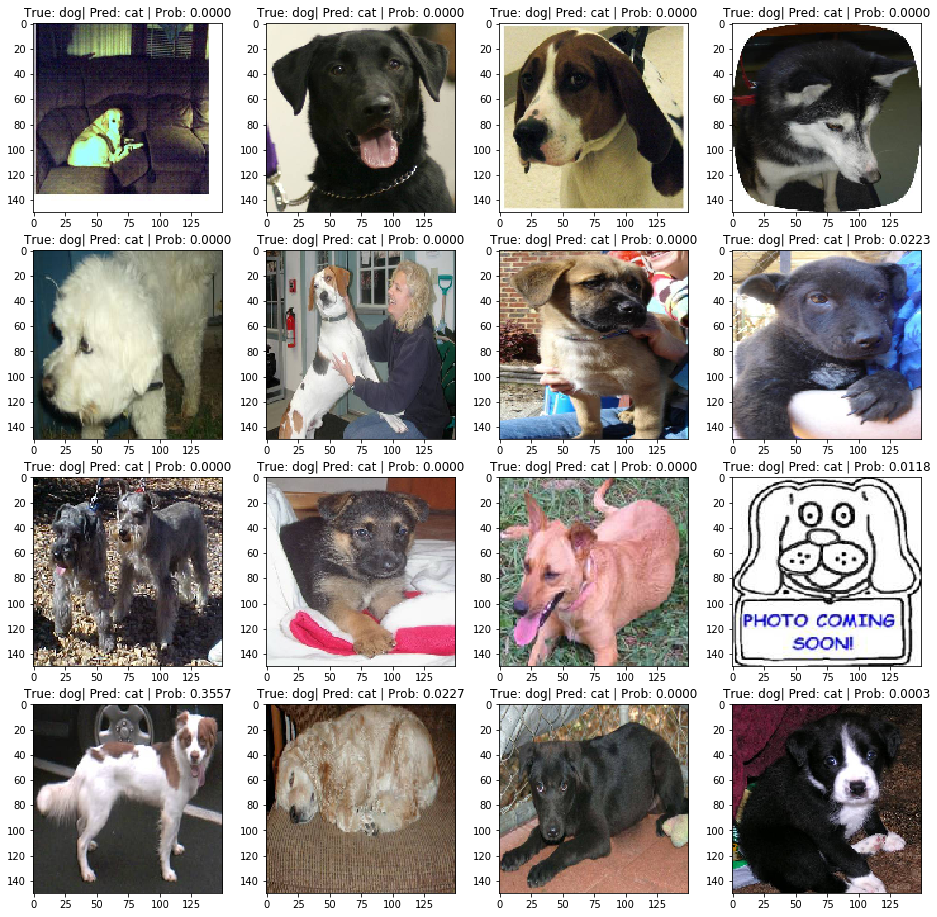

In [46]:
df_error = df[(df['true_label'] != df['pred_label']) & (df['true_label'] == 'dog')]
#对分类错误记录进行随机抽取，每次抽取16行记录，可以反复运行此段代码，随机查看分类错误图片
df_error_sample = df_error.sample(n=16, replace = False, axis = 0)
files_error = list(df_error_sample['file'])
true_labels_error =  list(df_error_sample['true_label'])
pred_labels_error =  list(df_error_sample['pred_label'])
pred_probs_error = list(df_error_sample['pred_prob'])


import matplotlib.pyplot as plt
n_rows= 4
n_cols= 4 

#16个分类错误记录用4x4图片排布展现出来
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 4*n_rows))

c = 0
for i in range(n_rows):
    for j in range(n_cols):
        img_dir = 'D:/2-AI读书学习笔记/99-dataset-lib/cat_dog/small_dataset_cat_dog/test/dogs/{}'.format(files_error[c])
        image_error = image.load_img(img_dir, target_size = (150,150))
        
        axs[i][j].imshow(image_error);
        axs[i][j].set_title('True: {}| Pred: {} | Prob: {:.4f}'.format(true_labels_error[c], pred_labels_error[c], pred_probs_error[c][0][0]));
        c+=1

### 6 将训练迭代次数从30增加至100

#### 重新训练模型

In [31]:
his_my_network = my_network.fit_generator(train_generator,
                                          steps_per_epoch = 100,
                                          epochs = 100,
                                          validation_data = validation_generator,
                                          validation_steps = 50)

my_network.save('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/cats_and_dogs_small_my_network_with_DR_no_da_with_100_epochs.h5')



Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
100/100 [==============================] - 99s 992ms/step - loss: 0.7076 - acc: 0.5270 - val_loss: 0.6825 - val_acc: 0.5750
Epoch 2/100
100/100 [==============================] - 99s 992ms/step - loss: 0.6767 - acc: 0.5970 - val_loss: 0.6096 - val_acc: 0.6540
Epoch 3/100
100/100 [==============================] - 96s 964ms/step - loss: 0.6267 - acc: 0.6465 - val_loss: 0.6139 - val_acc: 0.6560
Epoch 4/100
100/100 [==============================] - 97s 973ms/step - loss: 0.6036 - acc: 0.7190 - val_loss: 0.6043 - val_acc: 0.6610
Epoch 5/100
100/100 [==============================] - 99s 991ms/step - loss: 0.5327 - acc: 0.7345 - val_loss: 0.5809 - val_acc: 0.7170
Epoch 6/100
100/100 [==============================] - 95s 952ms/step - loss: 0.5063 - acc: 0.7440 - val_loss: 0.5837 - val_acc: 0.7170
Epoch 7/100
100/100 [==============================] - 97s 967ms/step - loss: 0.4427 - acc: 0.7990 - val_los

Epoch 59/100
100/100 [==============================] - 98s 982ms/step - loss: 0.0340 - acc: 0.9960 - val_loss: 4.3591 - val_acc: 0.6810
Epoch 60/100
100/100 [==============================] - 96s 957ms/step - loss: 0.0410 - acc: 0.9885 - val_loss: 4.8944 - val_acc: 0.7110
Epoch 61/100
100/100 [==============================] - 96s 963ms/step - loss: 0.0728 - acc: 0.9935 - val_loss: 5.9537 - val_acc: 0.6900
Epoch 62/100
100/100 [==============================] - 100s 998ms/step - loss: 0.0111 - acc: 0.9960 - val_loss: 7.4610 - val_acc: 0.7150
Epoch 63/100
100/100 [==============================] - 96s 962ms/step - loss: 0.0314 - acc: 0.9950 - val_loss: 7.7833 - val_acc: 0.7440
Epoch 64/100
100/100 [==============================] - 97s 970ms/step - loss: 0.0825 - acc: 0.9890 - val_loss: 5.5025 - val_acc: 0.7130
Epoch 65/100
100/100 [==============================] - 96s 964ms/step - loss: 0.0905 - acc: 0.9925 - val_loss: 3.6407 - val_acc: 0.6740
Epoch 66/100
100/100 [==================

NameError: name 'history_data_arg' is not defined

In [32]:
import pickle
with open('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_2_network_cnn_no_da_100_trainHistoryDict.txt', 'wb') as file_pi:
    pickle.dump(his_my_network.history, file_pi)#将训练历史数据保存到指定文件中

#### 重新评估模型在测试集的表现

In [35]:
import os
from keras.preprocessing import image

classes = ['cats','dogs']
files_name = []
test_true_labels = []
test_pred_labels = []
test_pred_probs = []

for c in classes:
    test_class_dir = 'D:/2-AI读书学习笔记/99-dataset-lib/cat_dog/small_dataset_cat_dog/test/{}'.format(c)
    for f in os.listdir(test_class_dir):
        
        files_name.append(f)
        test_true_labels.append(f[0:3])
        
        img_path = os.path.join(test_class_dir, f)
        img = image.load_img(img_path, target_size = (150, 150))
        pred = my_network.predict(preprocess_img(img))
        test_pred_probs.append(pred)
        
        pred_label = None
        if pred[0] > 0.5:
            pred_label = 'dog'
        else:
            pred_label = 'cat'
        test_pred_labels.append(pred_label) 
        

import pandas as pd
df = pd.DataFrame(data={'file':files_name, 'true_label':test_true_labels,  'pred_label':test_pred_labels, 'pred_prob':test_pred_probs})


        
pred_correct_records = df[df['true_label'] == df['pred_label']].shape[0]
correct_rate = float(pred_correct_records)/float(1000)
correct_rate 

0.689

#### 重新评估模型在训练集/验证集的表现

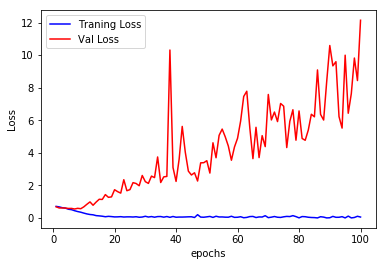

In [41]:
import matplotlib.pyplot as plt

train_loss = his_my_network.history['loss']
val_loss = his_my_network.history['val_loss']

epochs = range(1, len(train_loss)+1)

plt.plot(epochs, train_loss, 'b', label = 'Traning Loss')
plt.plot(epochs, val_loss, 'r', label = 'Val Loss')

plt.xlabel('epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

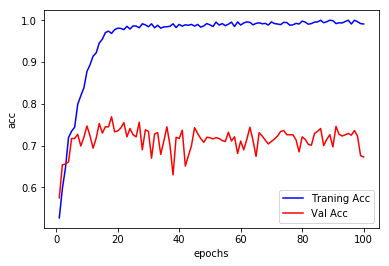

In [42]:
train_acc = his_my_network.history['acc']
val_acc = his_my_network.history['val_acc']

plt.plot(epochs, train_acc, 'b', label = 'Traning Acc')
plt.plot(epochs, val_acc, 'r', label = 'Val Acc')

plt.xlabel('epochs')
plt.ylabel('acc')

plt.legend()
plt.show()